In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import os.path

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [3]:
train_labels = []
train_samples = []

In [4]:
# training set
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [7]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [8]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, verbose=2)

Epoch 1/30
189/189 - 2s - loss: 0.7165 - accuracy: 0.4217 - val_loss: 0.6991 - val_accuracy: 0.4238
Epoch 2/30
189/189 - 0s - loss: 0.6817 - accuracy: 0.6138 - val_loss: 0.6667 - val_accuracy: 0.6810
Epoch 3/30
189/189 - 0s - loss: 0.6475 - accuracy: 0.7116 - val_loss: 0.6358 - val_accuracy: 0.7238
Epoch 4/30
189/189 - 0s - loss: 0.6098 - accuracy: 0.7677 - val_loss: 0.5978 - val_accuracy: 0.7762
Epoch 5/30
189/189 - 0s - loss: 0.5751 - accuracy: 0.8011 - val_loss: 0.5663 - val_accuracy: 0.8048
Epoch 6/30
189/189 - 0s - loss: 0.5438 - accuracy: 0.8206 - val_loss: 0.5366 - val_accuracy: 0.8333
Epoch 7/30
189/189 - 0s - loss: 0.5146 - accuracy: 0.8365 - val_loss: 0.5081 - val_accuracy: 0.8429
Epoch 8/30
189/189 - 0s - loss: 0.4863 - accuracy: 0.8492 - val_loss: 0.4790 - val_accuracy: 0.8476
Epoch 9/30
189/189 - 0s - loss: 0.4590 - accuracy: 0.8656 - val_loss: 0.4507 - val_accuracy: 0.8667
Epoch 10/30
189/189 - 0s - loss: 0.4331 - accuracy: 0.8852 - val_loss: 0.4255 - val_accuracy: 0.8667

In [12]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [13]:
for i in predictions:
    print(i)

[0.06378946 0.9362105 ]
[0.04919588 0.9508041 ]
[0.9742134  0.02578658]
[0.17380303 0.826197  ]
[0.04919588 0.9508041 ]
[0.04668389 0.95331615]
[0.97315246 0.02684761]
[0.17380303 0.826197  ]
[0.6112044  0.38879564]
[0.12608494 0.87391514]
[0.9739169  0.02608308]
[0.1564851 0.8435149]
[0.79122347 0.2087765 ]
[0.9669039  0.03309613]
[0.23472968 0.76527035]
[0.45607597 0.543924  ]
[0.04919588 0.9508041 ]
[0.2580576 0.7419424]
[0.05183568 0.94816434]
[0.04668389 0.95331615]
[0.14059922 0.85940075]
[0.07827231 0.9217277 ]
[0.79122347 0.2087765 ]
[0.9743362  0.02566375]
[0.14059922 0.85940075]
[0.19259965 0.80740035]
[0.9742134  0.02578658]
[0.03780615 0.96219385]
[0.14059922 0.85940075]
[0.2580576 0.7419424]
[0.9743362  0.02566375]
[0.03399871 0.9660013 ]
[0.2580576 0.7419424]
[0.97315246 0.02684761]
[0.04429419 0.95570576]
[0.03399871 0.9660013 ]
[0.9743838  0.02561627]
[0.07068895 0.92931104]
[0.03780615 0.96219385]
[0.58094937 0.41905066]
[0.97446436 0.02553566]
[0.45607597 0.543924  ]


In [14]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [16]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [17]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[188  22]
 [  9 201]]


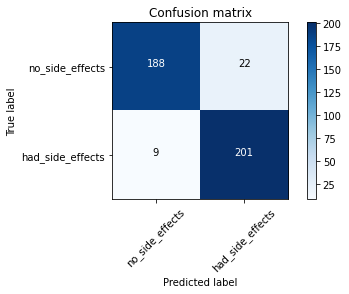

In [18]:
cm_plot_lables = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_lables, title='Confusion matrix')

In [20]:
model.save('models/medical_trial_model.h5')